# Local Businesses' Classification

### Importing essential libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
### Importing revenue dataset

revenue_df = pd.read_csv("generated_revenue_data.csv")
revenue_df.head()

,Unnamed: 0,ISBN,store_name,gender_of_owner,2010_revenue_till_june,2011_revenue_till_june,2012_revenue_till_june,2013_revenue_till_june,2014_revenue_till_june,2015_revenue_till_june,2016_revenue_till_june,2017_revenue_till_june,2018_revenue_till_june,2019_revenue_till_june,2020_revenue_till_june,zip_codes
0,0,357765302-7,Waters-Wunsch,Female,100819,112509,123944,137538,149566,164316,179411,198312,218097,230448,129431,94621
1,1,998155268-2,VonRueden-Jenkins,Male,113084,126738,139531,153422,167274,186978,197318,215656,231218,248714,110034,94546
2,2,515154998-7,"Stanton, Gislason and Deckow",Female,146726,158604,177580,194941,208128,218759,230549,247263,263878,279697,173066,94116
3,3,997744982-1,Auer-Lind,Female,115260,127096,138848,149751,161231,176138,187878,198611,214950,231737,102909,94970
4,4,484474585-9,Zulauf and Sons,Female,119924,130434,141699,154061,165971,176935,190425,204749,214778,228993,123748,94558


## Data Cleaning

In [3]:
# Firtly, it is necessary to drop features that are not necessary for our analysis
# Dropping features -> Unnamed, ISBN, store_name and zip_code, that do not have any positive impact on our dataset

revenue_df.drop(["Unnamed: 0", "ISBN", "store_name", "zip_codes", "gender_of_owner"], axis=1, inplace=True)
revenue_df.head()

,2010_revenue_till_june,2011_revenue_till_june,2012_revenue_till_june,2013_revenue_till_june,2014_revenue_till_june,2015_revenue_till_june,2016_revenue_till_june,2017_revenue_till_june,2018_revenue_till_june,2019_revenue_till_june,2020_revenue_till_june
0,100819,112509,123944,137538,149566,164316,179411,198312,218097,230448,129431
1,113084,126738,139531,153422,167274,186978,197318,215656,231218,248714,110034
2,146726,158604,177580,194941,208128,218759,230549,247263,263878,279697,173066
3,115260,127096,138848,149751,161231,176138,187878,198611,214950,231737,102909
4,119924,130434,141699,154061,165971,176935,190425,204749,214778,228993,123748


In [4]:
# Since we generated the data - we dont expect to have missing values

# However, it is a good practice to check for any missing values in the dataset

# As we can see below, the dataset doesnt have any missing values

revenue_df.isnull().sum()

2010_revenue_till_june    0
2011_revenue_till_june    0
2012_revenue_till_june    0
2013_revenue_till_june    0
2014_revenue_till_june    0
2015_revenue_till_june    0
2016_revenue_till_june    0
2017_revenue_till_june    0
2018_revenue_till_june    0
2019_revenue_till_june    0
2020_revenue_till_june    0
dtype: int64

## Generating labels for the dataset

     Labels would give classes to local book stores according to the capacity they are financially hit

### Using clustering to generate labels for the stores
     
     Checking the dataset for optimal cluster size - using elbow method

In [5]:
# finding optimal cluster size depending on sum-of-squared-errors

def elbow_method(data, max_limit):
    sse=[]

    # Running clustering for sizes of 1 to 10
    K_range = range(1, max_limit+1)
    for k in K_range:
        clusters = KMeans(n_clusters=k)
        clusters = clusters.fit(data)
        sse.append(clusters.inertia_)
    print("The sum of squared errors is: ", sse)
    print()

    # Plotting for each of cluster sizes along with their sse values
    plt.plot(K_range, sse, 'bx-')
    plt.ylabel("Sum of Squared Errors")
    plt.xlabel("Number of clusters")
    plt.title("Optimization of cluster size using elbow method")
    plt.show()


The sum of squared errors is:  [30665067972866.07, 8570604830575.145, 3654199005592.038, 2315737154394.3945, 1556407756925.0225, 1184379994238.2922, 955912009870.3429, 773111152813.2471, 692290349816.5796, 620212203453.9529]



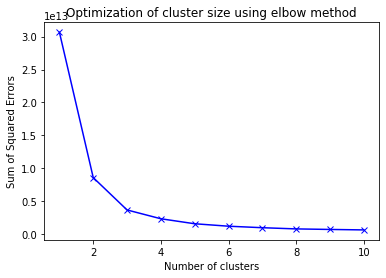

In [6]:
# Running elbow method to find out the optimum number of clusters for labelling

# As we can see below - the optimal number of clusters is three

elbow_method(revenue_df, 10)

In [7]:
# Clustering our dataset into three clusters according to elbow method

kmeans_clusters = KMeans(n_clusters=3).fit(revenue_df)


In [ ]:
# Extracting cluster labels
cluster_labels = kmeans_clusters.labels_


#printing cluster labels
for group in set(cluster_labels):
    print("\nGroup : ",group, "\n-----------------")


for i in revenue_df.index:
        if cluster_labels[i] == group:
            print(revenue_df.index[i])